In [1]:
#importing packages
from __future__ import print_function
import h5py
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 


In [4]:
path_dir = os.path.dirname("C:/LANL/2021_Electrode Scans/scans/")  #Directory where the files are
all_files = os.listdir(path_dir)

for x in all_files:
    file_in= (x[:-4] + ".hdf")
    print("Now converting", file_in)
    file_name = os.path.join(path_dir, file_in)
    
    df = pd.read_hdf(file_name)

    with h5py.File( file_name, "r") as f1:
    # Read attributes from hdf file
        rate = f1.attrs['rate']
        start_time = f1.attrs['start_time']
        end_time = f1.attrs['end_time']


    df['time'] = np.arange(len(df.index))/rate
    
   
    file_out= (x[:-4] + ".txt")
    file_name_out = os.path.join(path_dir, file_out)
    df.to_csv(file_name_out, sep='\t', mode='a')
    print("File converted", file_out)
    print("        ")


Now converting coil_1000gain_april21_pos8_r5.hdf
File converted coil_1000gain_april21_pos8_r5.txt
        
Now converting coil_1000gain_april21_pos8_r7.hdf
File converted coil_1000gain_april21_pos8_r7.txt
        


In [9]:
#testing if the conversion works
path_dir = os.path.dirname("C:/LANL/2021_Electrode Scans/scans/")
file_name = os.path.join(path_dir, 'coil_1000gain_april21_pos8_r5.hdf')

df = pd.read_hdf(file_name)

with h5py.File( file_name, "r") as f1:
# Read attributes from hdf file
    rate = f1.attrs['rate']
    start_time = f1.attrs['start_time']
    end_time = f1.attrs['end_time']


df['time'] = np.arange(len(df.index))/rate

df.head(5)

,chan0,chan1,chan2,chan3,chan4,chan5,time
0,-3.239311,-1.262192,-0.528433,-0.707405,-2.075966,2.260853,0.00
1,-3.239389,-1.261880,-0.528433,-0.707249,-2.075888,2.260931,0.01
2,-3.239232,-1.261958,-0.528042,-0.707093,-2.075888,2.260697,0.02
3,-3.239389,-1.262271,-0.528433,-0.707171,-2.075888,2.261087,0.03
4,-3.239701,-1.262271,-0.528198,-0.707093,-2.075810,2.260853,0.04


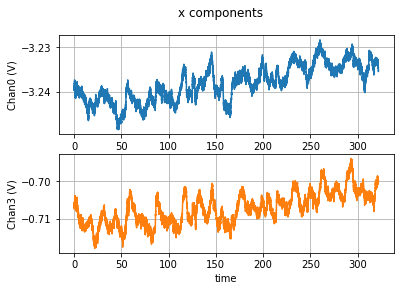

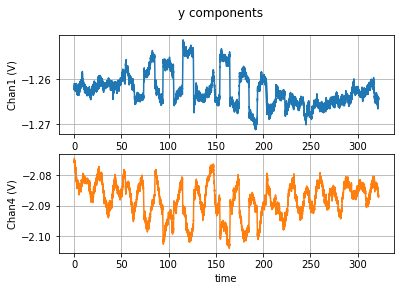

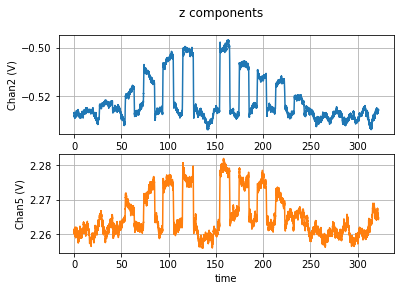

In [10]:
# Plotting the x components
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(df.time, df.chan0)
plt.ylabel('Chan0 (V)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df.time, df.chan3,  color='C1')
plt.xlabel("time")
plt.ylabel('Chan3 (V)')

plt.suptitle('x components')
plt.grid()
#plt.show()



# Plotting the y components
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(df.time, df.chan1)
plt.ylabel('Chan1 (V)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df.time, df.chan4,  color='C1')
plt.xlabel("time")
plt.ylabel('Chan4 (V)')

plt.suptitle('y components')
plt.grid()
#plt.show()


# Plotting the z components
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(df.time, df.chan2)
plt.ylabel('Chan2 (V)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df.time, df.chan5,  color='C1')
plt.xlabel("time")
plt.ylabel('Chan5 (V)')

plt.suptitle('z components')
plt.grid()
plt.show()
